<a id="Top"></a>

# Client Product Interest Prediction based on Machine Learning Classification 

## Contents
1. [Introduction](#Intro)
2. [Source](#Source) 

#### Part 1: Analysis and Preparation of the Model

3. [Exploratory Data Analysis](#EDA)
    1. [Preliminary Examination](#PE)
    2. [Data Cleaning and Preparation, Feature Selection](#DC)
    3. [Visualization](#viz)
5. [Feature Engineering]
6. [Feature Selection]

#### Part 2: Machine Learning

7. [Training](#ML)
8. [Testing]
9. [Conclusions]
10. [Relevant Research]

<a id = "Intro"></a>

### Introduction 
When a business seeks to increase revenue, a myriad of strategies can be employed. One technique is to sell more to current clientelle. The advantage of this approach is that the leads are already captured and are in a position of trust in the vendor, and it is therefore not a random cold-calling situation. The challenge, however --and this is not unique to this scenario, but applies in any marketing campaign-- is balancing the time and money needed for the marketing effort vs the actual resultant revenue. Ah, if only there was a way to optimize it! To know which customers would most likely be interested in the product, so that we could market to them directly instead of blanketing the entire client base in the usual hit-and-miss fashion! To reduce the hassle, the headache, the aggravation, the woes! Is there a way to know? Well, in 2021, there is! And it does not involve calling your shaman uncle from New Orleans to do voodoo sourcery. We can just use machine learning.

#### Overarching Goal
Can we use Machine Learning to predict which customers at this bank would be interested in buying a credit card product based on a set of characteristics? In this project, I analyze the data, prepare it, and build the ML model which will make this prediction. 

#### Defined objectives
1. Find out which customer is most likely to be interested in buying a product using a machine learning prediction algorithm (classification).
2. Learn what factor is the most influential in determining the likelyhood that a client will be a lead based on the given attributes. 

#### Motivation
Assist a business in increasing its profit by enabling the marketing department to more accurately target clients that are most likely to buy, in turn reducing cost and turn-around time. 

<a id="Source"></a>

### Source:
The dataset is from https://www.kaggle.com/nextbigwhat/analytics-vidhya-job-a-thon-may-2021



<br><br>

[Back to Top](#Top)

## Part 1: Analysis and Preparation of the Model

<a id="EDA"></a>

## Exploratory Data Analysis

<a id = "PE"></a>

### Preliminary Examination of Data

In [1]:
#Import Libraries

import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,5]
warnings.filterwarnings("ignore")

# Multiple Line Output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Load dataset and apply variable name
dataset = pd.read_csv('../Datasets/AnalyticsVidhya-JOB_A_THON-May2021/train_s3TEQDk.csv')

#The original data contains two files, which appear to be a dataset divided in two. Since one is much larger than the other, we'll stick to that one.

In [3]:
#Preliminary examination of dataset / EDA

print('Preview')
dataset
print('-----------------------------------------------------')
print(f'The shape of the dataset is {dataset.shape}.')
print('-----------------------------------------------------')
print('Describe')
dataset.describe().T
print('-----------------------------------------------------')
print('Info')
dataset.info()

Preview


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


-----------------------------------------------------
The shape of the dataset is (245725, 11).
-----------------------------------------------------
Describe


,count,mean,std,min,25%,50%,75%,max
Age,245725.0,4.385631e+01,14.828672,23.0,30.0,43.0,54.0,85.0
Vintage,245725.0,4.695914e+01,32.353136,7.0,20.0,32.0,73.0,135.0
Avg_Account_Balance,245725.0,1.128403e+06,852936.356069,20790.0,604310.0,894601.0,1366666.0,10352009.0
Is_Lead,245725.0,2.372083e-01,0.425372,0.0,0.0,0.0,0.0,1.0


-----------------------------------------------------
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [4]:
print('Count of lead values (yes/no)')
dataset.Is_Lead.value_counts()
print('-----------------------------------------------------')
print('Count of active values (yes/no)')
dataset.Is_Active.value_counts()
print('-----------------------------------------------------')
dataset[['Is_Active', 'Is_Lead']].apply(pd.Series.value_counts)

Count of lead values (yes/no)


0    187437
1     58288
Name: Is_Lead, dtype: int64

-----------------------------------------------------
Count of active values (yes/no)


No     150290
Yes     95435
Name: Is_Active, dtype: int64

-----------------------------------------------------


,Is_Active,Is_Lead
No,150290.0,NaN
Yes,95435.0,NaN
0,NaN,187437.0
1,NaN,58288.0


The dataset contains 245,725 rows (clients) and 11 columns. 
The target (dependent) variable is 'Is_Lead'. This means whether the customer has indicated interest. 
The other 10 columns are the independent variables.

<a id="DC"></a>

### Data Cleaning, Feature Selection

In [5]:
df = dataset

In [6]:
#Check that there are no duplicate rows

print("Total rows:") 
df.shape
print("Total unique rows:")
df.ID.unique().shape

#Store original number of rows for comparison of kept/removed rows later (
original_row_num = df.shape[0]

#Create new variable to preserve original untouched for future use
dfmod = df.copy()

#Some columns are uneeded, so we'll go ahead and remove those.
dfmod.drop(['ID'], axis=1, inplace=True)

Total rows:


(245725, 11)

Total unique rows:


(245725,)

There are no duplicate records.

In [7]:
#Turn records into numerical values where possible
dfmod["Gender"].replace({"Male": "0", "Female": "1"}, inplace=True)
dfmod["Credit_Product"].replace({"No": "0", "Yes": "1"}, inplace=True)
dfmod["Is_Active"].replace({"No": "0", "Yes": "1"}, inplace=True)
dfmod.head(5)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,1,73,RG268,Other,X3,43,0,1045696,0,0
1,1,30,RG277,Salaried,X1,32,0,581988,0,0
2,1,56,RG268,Self_Employed,X3,26,0,1484315,1,0
3,0,34,RG270,Salaried,X1,19,0,470454,0,0
4,1,30,RG282,Salaried,X1,33,0,886787,0,0


In [8]:
# Check the column data types
dfmod.dtypes

Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [9]:
# Check how many unique values in all columns
for col in dfmod.columns:
    count = dfmod[col].unique().shape[0]
    print(col + ': ' + str(count))

Gender: 2
Age: 63
Region_Code: 35
Occupation: 4
Channel_Code: 4
Vintage: 66
Credit_Product: 3
Avg_Account_Balance: 135292
Is_Active: 2
Is_Lead: 2


In [10]:
# Check presence of null values in any columns
(dfmod.astype(np.object).isnull()).any()

Gender                 False
Age                    False
Region_Code            False
Occupation             False
Channel_Code           False
Vintage                False
Credit_Product          True
Avg_Account_Balance    False
Is_Active              False
Is_Lead                False
dtype: bool

In [11]:
# Calculate total number of null values in all of the columns
for col in dfmod.columns:
    count = dfmod[col].isnull().sum()
    print(col + ' ' + str(count))

Gender 0
Age 0
Region_Code 0
Occupation 0
Channel_Code 0
Vintage 0
Credit_Product 29325
Avg_Account_Balance 0
Is_Active 0
Is_Lead 0


In [12]:
print('Count of credit product values')
dfmod.Credit_Product.value_counts()

Count of credit product values


0    144357
1     72043
Name: Credit_Product, dtype: int64

In [13]:
#Since null values in Credit_Product column constitute a significant portion of the data, impute them to "999"

dfmod['Credit_Product'].fillna("999",inplace=True)
dfmod

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,1,73,RG268,Other,X3,43,0,1045696,0,0
1,1,30,RG277,Salaried,X1,32,0,581988,0,0
2,1,56,RG268,Self_Employed,X3,26,0,1484315,1,0
3,0,34,RG270,Salaried,X1,19,0,470454,0,0
4,1,30,RG282,Salaried,X1,33,0,886787,0,0
...,...,...,...,...,...,...,...,...,...,...
245720,0,51,RG284,Self_Employed,X3,109,999,1925586,0,0
245721,0,27,RG268,Salaried,X1,15,0,862952,1,0
245722,1,26,RG281,Salaried,X1,13,0,670659,0,0
245723,1,28,RG273,Salaried,X1,31,0,407504,0,0


In [14]:
# Recheck presence of nulls
(dfmod.astype(np.object).isnull()).any()
print('-----------------------------------------------------')
for col in dfmod.columns:
    count = dfmod[col].isnull().sum()
    print(col + ' ' + str(count))

Gender                 False
Age                    False
Region_Code            False
Occupation             False
Channel_Code           False
Vintage                False
Credit_Product         False
Avg_Account_Balance    False
Is_Active              False
Is_Lead                False
dtype: bool

-----------------------------------------------------
Gender 0
Age 0
Region_Code 0
Occupation 0
Channel_Code 0
Vintage 0
Credit_Product 0
Avg_Account_Balance 0
Is_Active 0
Is_Lead 0


In [15]:
#Check the values in that column once more
print('Count of credit product values')
dfmod.Credit_Product.value_counts()

Count of credit product values


0      144357
1       72043
999     29325
Name: Credit_Product, dtype: int64

In [16]:
# Check the column data types again
dfmod.dtypes

Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [17]:
#Convert numeric columns to the appropriate type where possible
dfmod = dfmod.apply(pd.to_numeric, errors='ignore')
dfmod.dtypes

Gender                  int64
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product          int64
Avg_Account_Balance     int64
Is_Active               int64
Is_Lead                 int64
dtype: object

In [18]:
# # Check the balance of the dataset
# # This dataset is unbalanced and will have to be dealt with in different ways
dfmod.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [19]:
# # Segment the dataset for visualization
# dfmod_Lead_Yes = dfmod[dfmod['Is_Lead'] == "1"]
# dfmod_Lead_No = dfmod[dfmod['Is_Lead'] == "0"]

In [20]:
dfmod.sample(10)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
123214,0,61,RG277,Self_Employed,X3,55,1,658760,0,0
119975,1,48,RG283,Self_Employed,X2,20,1,947787,0,0
14340,1,26,RG270,Salaried,X1,15,0,790355,0,0
166137,1,39,RG283,Self_Employed,X2,63,0,458154,0,0
39191,1,37,RG256,Salaried,X1,33,0,1143552,0,0
10468,0,41,RG254,Self_Employed,X2,75,0,1888188,0,0
55405,0,46,RG269,Self_Employed,X3,61,0,2021866,1,0
83937,1,63,RG252,Other,X3,74,1,293459,1,0
165599,1,31,RG251,Salaried,X1,27,1,566075,1,0
9202,1,33,RG268,Salaried,X1,32,0,1359021,0,0


[Back to Top](#Top)

<a id="viz"></a>

### Visualization

<AxesSubplot:xlabel='Is_Active', ylabel='Avg_Account_Balance'>

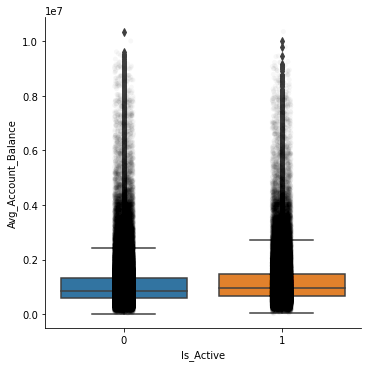

In [21]:
# Look at the differences between leads and non-leads in terms of average account balance

sns.catplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = dfmod,  kind="box")
sns.stripplot(x = 'Is_Active', y = 'Avg_Account_Balance', data = dfmod, jitter=0.06,color='k',alpha=0.03)

<AxesSubplot:xlabel='Is_Active', ylabel='Avg_Account_Balance'>

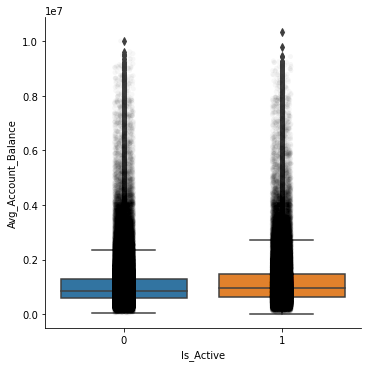

In [22]:
# Look at the differences between active and inactive clients in terms of average account balance 

sns.catplot(x = 'Is_Active', y = 'Avg_Account_Balance', data = dfmod,  kind="box")
sns.stripplot(x = 'Is_Active', y = 'Avg_Account_Balance', data = dfmod, jitter=0.06,color='k',alpha=0.03)

In [23]:
dfmod.head(0)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead


In [24]:
bins = np.arange(dfmod.Avg_Account_Balance.min(),dfmod.Avg_Account_Balance.max(),200000)

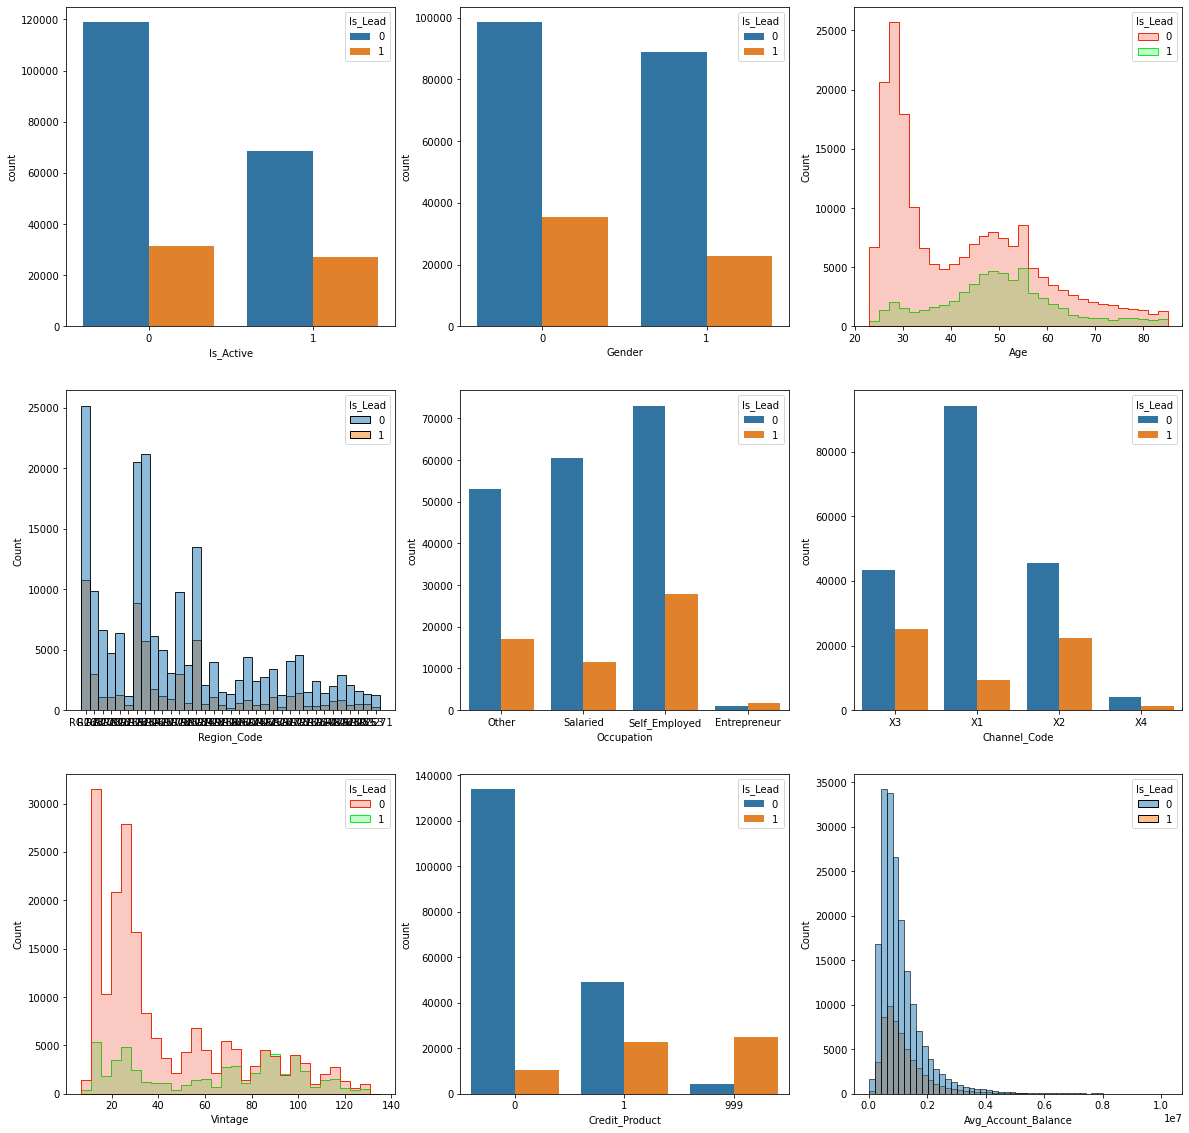

In [39]:
# Check contributing factors to a client being a lead across customer attributes

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (20,20))
sns.countplot(x = "Is_Active", hue = 'Is_Lead', data = dfmod, ax=axes[0][0])
sns.countplot(x = "Gender", hue = 'Is_Lead', data = dfmod, ax=axes[0][1])
sns.histplot(x = "Age", hue = 'Is_Lead', bins=30, data = dfmod, element = "step", ax=axes[0][2], palette=['#ed2e0c',"#0ced26"])
sns.histplot(x = 'Region_Code', hue = "Is_Lead", bins = 50, data = dfmod, element = "bars", ax=axes[1][0],)
sns.countplot(x = "Occupation", hue = 'Is_Lead', data = dfmod, ax=axes[1][1])
sns.countplot(x = "Channel_Code", hue = 'Is_Lead', data = dfmod, ax=axes[1][2])
sns.histplot(x = "Vintage", bins = 30, hue = 'Is_Lead', data = dfmod, ax=axes[2][0], element = 'step', palette=['#ed2e0c',"#0ced26"])
sns.countplot(x = "Credit_Product", hue = 'Is_Lead', data = dfmod, ax=axes[2][1])
sns.histplot(x = "Avg_Account_Balance", hue = "Is_Lead", bins = bins, data = dfmod, ax=axes[2][2])
#ax = sns.countplot(x = "Credit_Product", hue = 'Gender', data = dfmod, ax=axes[1][2])
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig);

#sns.countplot(x = "Region_Code", hue = 'Is_Lead', data = dfmod, ax=axes[1][0]) #remove.

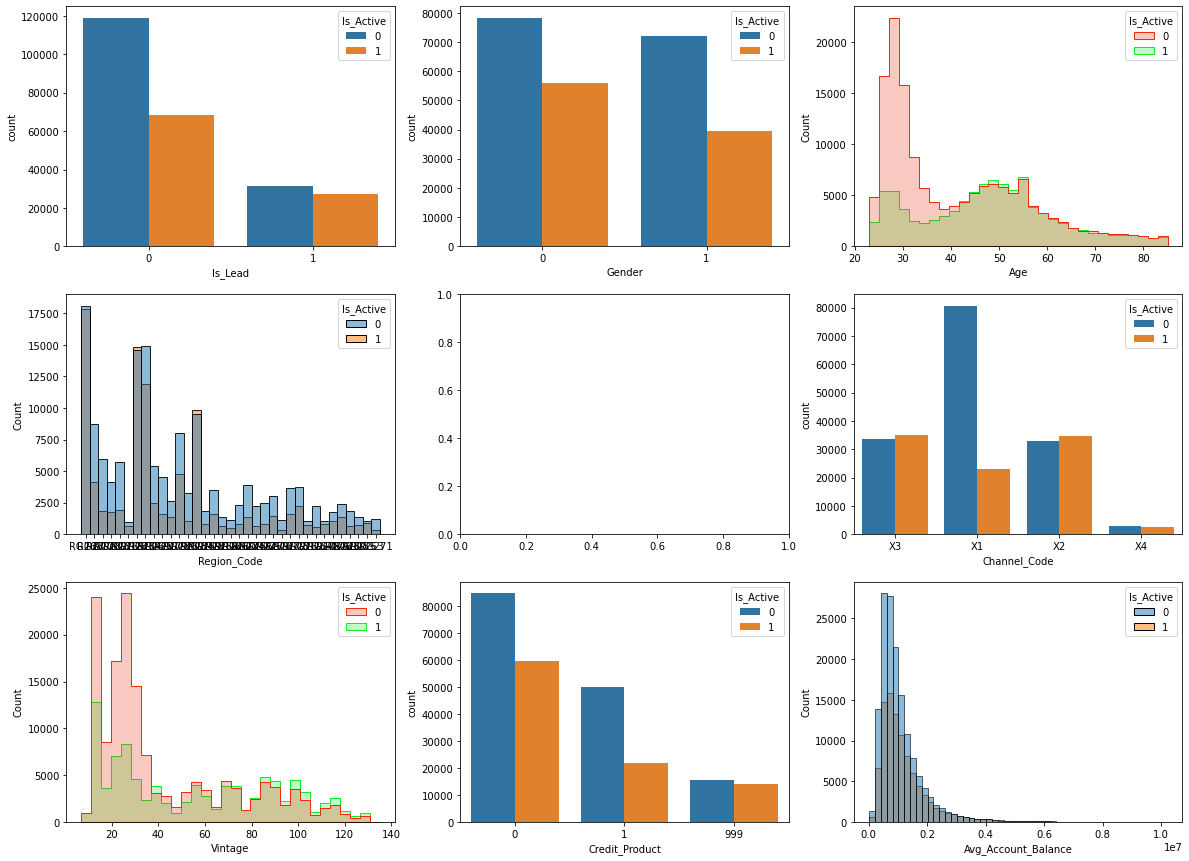

In [47]:
# Check contributing factors to a customer being active across customer attributes

bins = np.arange(dfmod.Avg_Account_Balance.min(),dfmod.Avg_Account_Balance.max(),200000)

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (20,15))
sns.countplot(x = "Is_Lead", hue = 'Is_Active', data = dfmod, ax=axes[0][0])
sns.countplot(x = "Gender", hue = 'Is_Active', data = dfmod, ax=axes[0][1])
sns.histplot(x = "Age", hue = 'Is_Active', bins=30, data = dfmod, element = "step", ax=axes[0][2], palette=['#ed2e0c',"#0ced26"])
sns.histplot(x = 'Region_Code', hue = "Is_Active", bins = 50, data = dfmod, element = "bars", ax=axes[1][0],)
sns.histplot(x = "Age", bins = 30, y = 'Vintage', data = dfmod, ax=axes[1][2])
sns.countplot(x = "Channel_Code", hue = 'Is_Active', data = dfmod, ax=axes[1][2])
sns.histplot(x = "Vintage", bins = 30, hue = 'Is_Active', data = dfmod, ax=axes[2][0], element = 'step', palette=['#ed2e0c',"#0ced26"])
sns.countplot(x = "Credit_Product", hue = 'Is_Active', data = dfmod, ax=axes[2][1])
sns.histplot(x = "Avg_Account_Balance", hue = "Is_Active", bins = bins, data = dfmod, ax=axes[2][2])
#ax = sns.countplot(x = "Credit_Product", hue = 'Gender', data = dfmod, ax=axes[1][2])
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig);

# sns.countplot(x = "Region_Code", hue = 'Is_Active', data = dfmod, ax=axes[1][0])

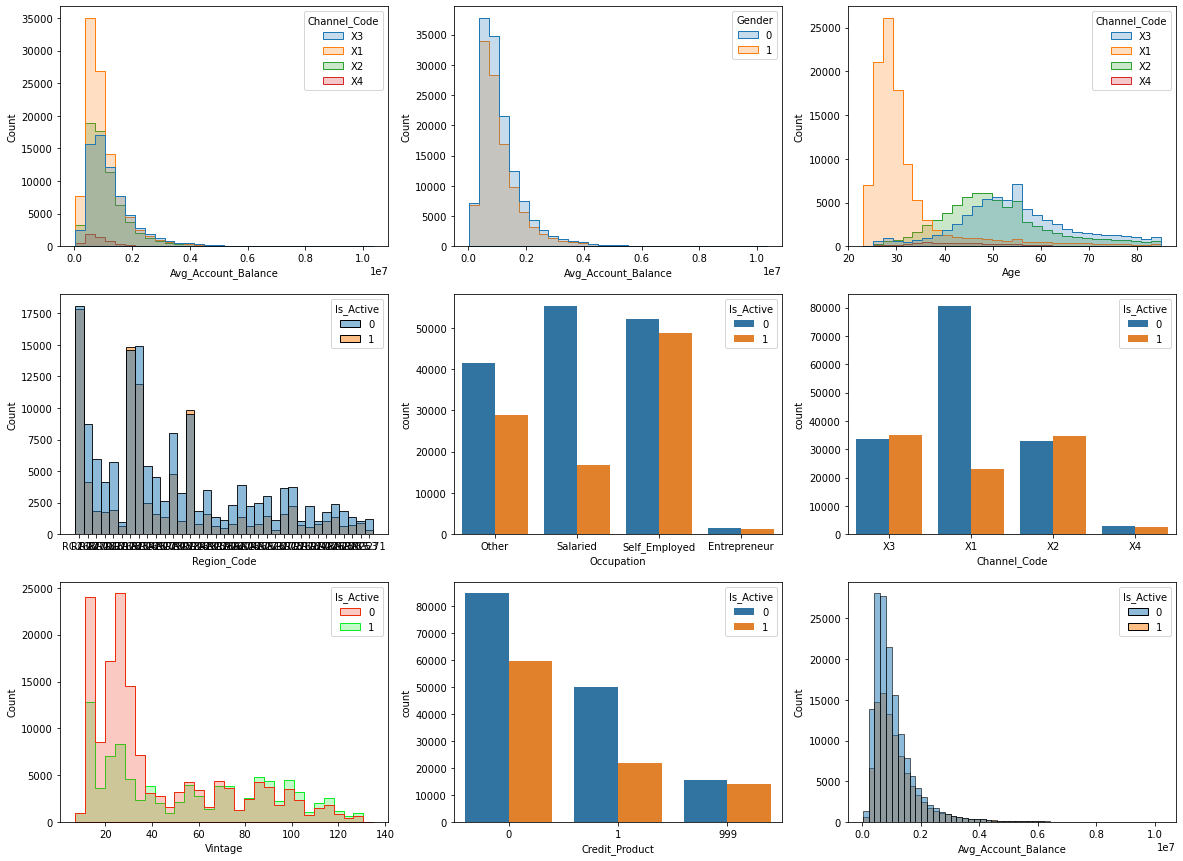

In [45]:
# Check contributing factors to channel codes and regions across customer attributes

bins = np.arange(dfmod.Avg_Account_Balance.min(),dfmod.Avg_Account_Balance.max(),200000)
#sns.histplot(x = "Vintage", bins = 30, hue = 'Is_Active', data = dfmod, ax=axes[2][0], element = 'step', palette=['#ed2e0c',"#0ced26"])
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (20,15))
sns.histplot(x = "Avg_Account_Balance", bins = 30, hue = 'Channel_Code', data = dfmod, ax=axes[0][0], element = 'step')
sns.histplot(x = "Avg_Account_Balance", bins = 30, hue = 'Gender', data = dfmod, ax=axes[0][1], element = 'step')
sns.histplot(x = "Age", hue = 'Channel_Code', bins=30, data = dfmod, element = "step", ax=axes[0][2])
sns.histplot(x = 'Region_Code', hue = "Is_Active", bins = 50, data = dfmod, element = "bars", ax=axes[1][0],)
sns.countplot(x = "Occupation", hue = 'Is_Active', data = dfmod, ax=axes[1][1])
sns.countplot(x = "Channel_Code", hue = 'Is_Active', data = dfmod, ax=axes[1][2])
sns.histplot(x = "Vintage", bins = 30, hue = 'Is_Active', data = dfmod, ax=axes[2][0], element = 'step', palette=['#ed2e0c',"#0ced26"])
sns.countplot(x = "Credit_Product", hue = 'Is_Active', data = dfmod, ax=axes[2][1])
sns.histplot(x = "Avg_Account_Balance", hue = "Is_Active", bins = bins, data = dfmod, ax=axes[2][2])
#ax = sns.countplot(x = "Credit_Product", hue = 'Gender', data = dfmod, ax=axes[1][2])
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig);

# sns.countplot(x = "Region_Code", hue = 'Is_Active', data = dfmod, ax=axes[1][0])

<AxesSubplot:xlabel='Vintage', ylabel='Age'>

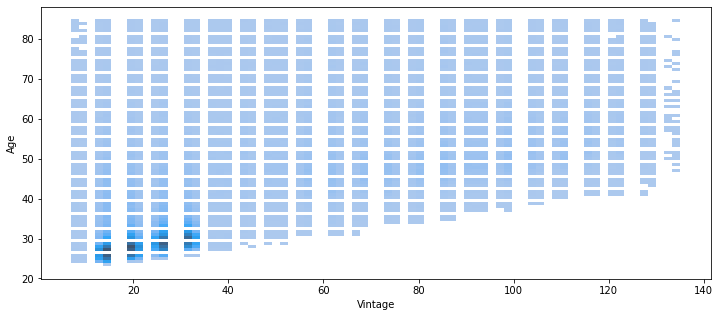

In [50]:
sns.histplot(dfmod, x="Vintage", y="Age")

In [ ]:
sns.histplot(dfmod, x="Gender", y="Channel_Code")

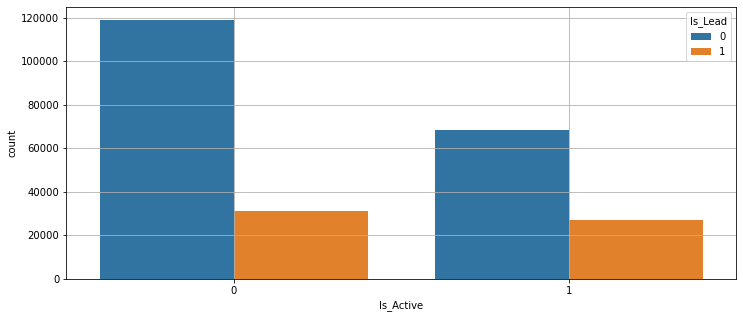

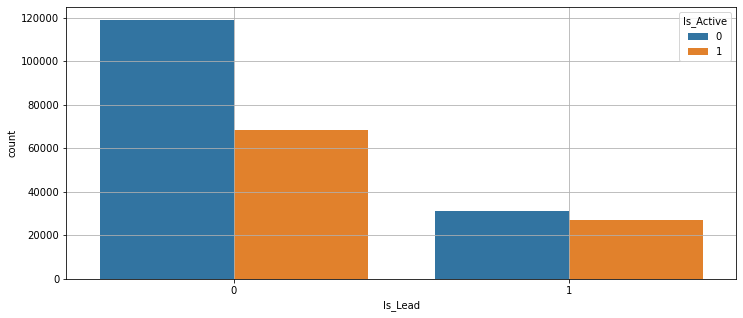

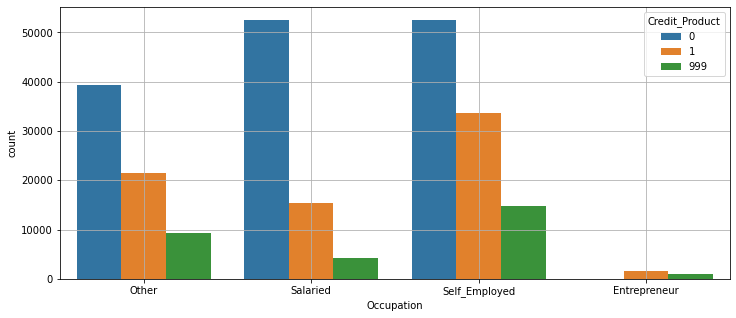

In [27]:
#Zooming in on whether inactive clients could be leads
sns.countplot(x = "Is_Active", hue = 'Is_Lead', data = dfmod)
plt.grid()
plt.show();
#Zooming in on how active are the leads
sns.countplot(x = "Is_Lead", hue = 'Is_Active', data = dfmod)
plt.grid()
plt.show();
#Which occupation has which product already?
sns.countplot(x = "Occupation", hue = 'Credit_Product', data = dfmod)
plt.grid()
plt.show();

In [28]:
#venn diagram not working for now

# from matplotlib_venn import venn2

# plt.figure(figsize=(4,4))
# set1 = set(dfmod.loc[dfmod['Is_Active'] == 1])
# set2 = set(dfmod.loc[dfmod['Is_Lead'] == 1])

# venn2([set1, set2], ('Active', 'Lead'))
# plt.show()

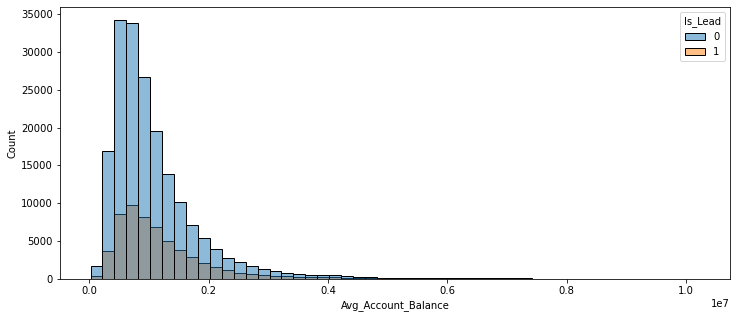

In [29]:
#Check Leads based on average account balance. 
#This is done in a dedicated cell since the Average Account attribute is the most data-heavy.
bins = np.arange(dfmod.Avg_Account_Balance.min(),dfmod.Avg_Account_Balance.max(),200000)
sns.histplot(x = "Avg_Account_Balance", hue = "Is_Lead", bins = bins, data = dfmod)
plt.show();

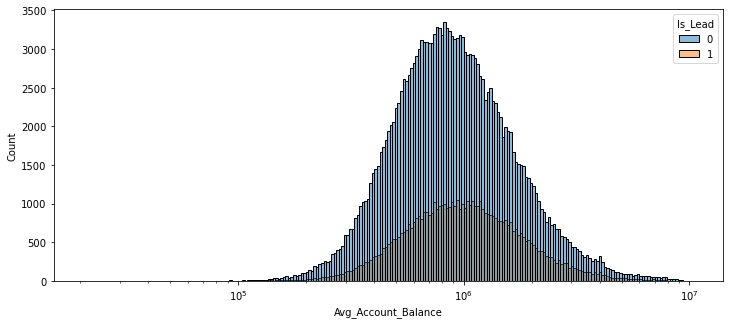

In [30]:
bins = np.arange(dfmod.Avg_Account_Balance.min(),dfmod.Avg_Account_Balance.max(),200000)
sns.histplot(x = "Avg_Account_Balance", hue = "Is_Lead", data = dfmod, log_scale=True)
plt.show();

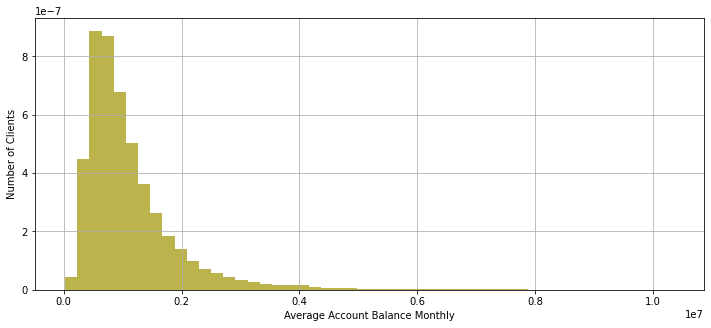

In [31]:
df['Avg_Account_Balance'].hist(bins=50, density=True,color='#bbb34b')
plt.ylabel('Number of Clients')
plt.xlabel('Average Account Balance Monthly')
plt.show();

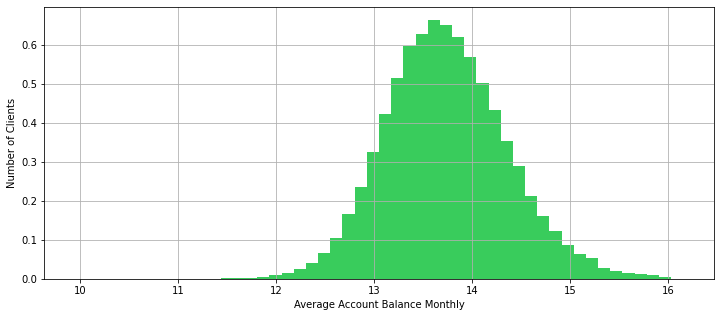

In [32]:
np.log(df['Avg_Account_Balance']).hist(bins=50, density=True,color='#39cc5c')
plt.ylabel('Number of Clients')
plt.xlabel('Average Account Balance Monthly')
plt.show();

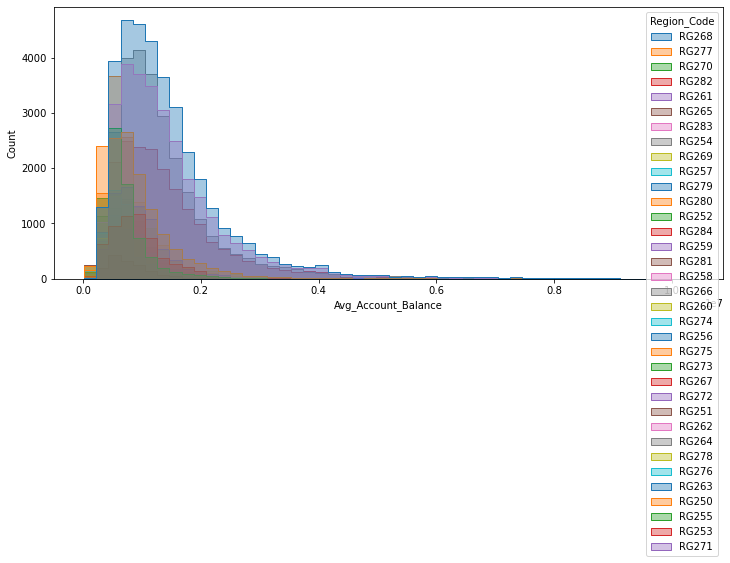

In [33]:
#Check Leads based on average account balance. 
#This is done in a dedicated cell since the Average Account attribute is the most data-heavy.
sns.histplot(x = "Avg_Account_Balance", hue = 'Region_Code', bins = 50, data = dfmod, palette = "tab10", element = "step", alpha = 0.4)
plt.show();
#sns.histplot(x = "Avg_Account_Balance", hue = 'Region_Code', bins = 50, element = "poly", data = dfmod, ax=axes[1][0])

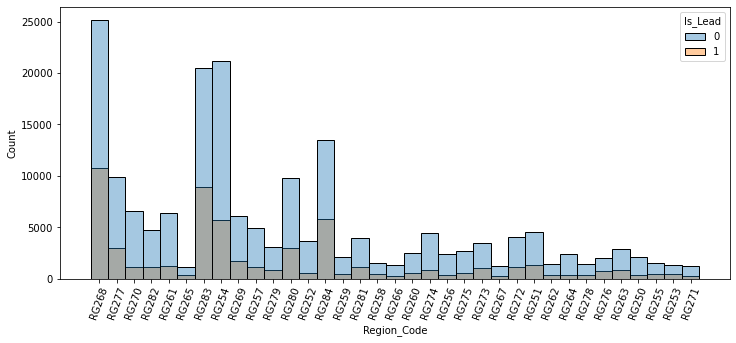

In [34]:
#Check Leads based on average account balance. 
#This is done in a dedicated cell since the Average Account attribute is the most data-heavy.
sns.histplot(x = 'Region_Code', hue = "Is_Lead", bins = 50, data = dfmod, palette = "tab10", element = "bars", alpha = 0.4)
plt.xticks(rotation=70) 
plt.show();
#sns.histplot(x = "Avg_Account_Balance", hue = 'Region_Code', bins = 50, element = "poly", data = dfmod, ax=axes[1][0])

In [35]:
dfmod.Avg_Account_Balance

0         1045696
1          581988
2         1484315
3          470454
4          886787
           ...   
245720    1925586
245721     862952
245722     670659
245723     407504
245724    1129276
Name: Avg_Account_Balance, Length: 245725, dtype: int64

AttributeError: 'Rectangle' object has no property 'bins'

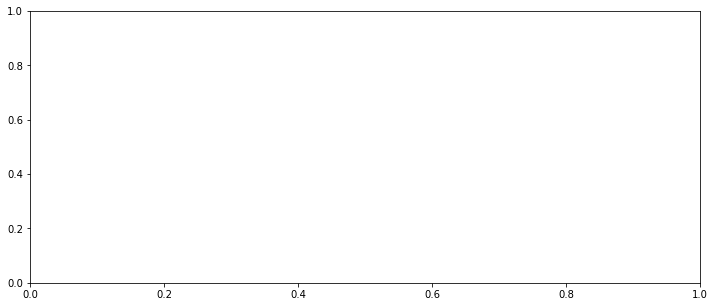

In [36]:
bins = np.arange(dfmod.Avg_Account_Balance.min(),dfmod.Avg_Account_Balance.max(),200000)
sns.countplot("Avg_Account_Balance", data=dfmod, bins =bins)
#plt.xticks(bins,rotation=70) 
plt.show();

In [ ]:
# top =  list(dfmod.Region_Code.value_counts() >7000)
# # top = top.index
# top = dfmod.Region_Code.loc[top]
top = dfmod.Region_Code.value_counts().sort_values(ascending=False) 
top = dfmod.Region_Code.value_counts().nlargest(5)
top

In [ ]:
plt.figure(figsize=(10, 15))
plt.pie(dfmod.Region_Code.value_counts().nlargest(5),
        autopct='%1.1f%%',labels=["RG268","RG283","RG254","RG284","RG277"], data=dfmod)
plt.legend()
#plt.xticks(bins,rotation=70)
plt.show();

In [ ]:
dfmod.region_cODE > plt.figure(figsize=(30, 25))
plt.pie(dfmod.Region_Code.value_counts(),autopct='%1.1f%%',labels= dfmod.Region_Code.unique(), data=dfmod)
plt.legend()
#plt.xticks(bins,rotation=70)
plt.show();

In [ ]:
g= sns.histplot(x="Avg_Account_Balance", hue="Region_Code", bins = 30, data=dfmod, legend=True, element = "step", palette = 'Set2')
plt.legend(title='Regions', loc='upper right', labels=['Region 1', 'Region 2', 'Region 3', 'Region 4'])
plt.show();

In [ ]:
#Some segmentation and filtering for visualization

Active = dfmod.loc[dfmod['Is_Active'] == 1].count()[0]
Inactive= dfmod.loc[dfmod['Is_Active'] == 0].count()[0]

Lead = dfmod.loc[dfmod['Is_Lead'] == 1].count()[0]
NotLead= dfmod.loc[dfmod['Is_Lead'] == 0].count()[0]

#Occupations

E = dfmod.loc[dfmod['Occupation'] == "Entrepreneur"].count()[0]
SE = dfmod.loc[dfmod['Occupation'] == "Self_Employed"].count()[0]
S = dfmod.loc[dfmod['Occupation'] == "Salaried"].count()[0]
O = dfmod.loc[dfmod['Occupation'] == "Other"].count()[0]

In [ ]:
# plt.figure(figsize=(15, 5))
# sns.distplot(Active['tenure'], color = "r", label = "Churn")
# sns.distplot(Inactive['tenure'], color = "g", label = "Not Churn")
# plt.legend()

# # Company tends to lose most of customers early on and is able to retain them in the long term
# plt.figure(figsize=(15, 5))
# sns.distplot(df_churn['tenure'], color = "r", label = "Churn")
# sns.distplot(df_notchurn['tenure'], color = "g", label = "Not Churn")
# plt.legend()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create an ordinal encoder and apply it to the dataframe
df_corr = dfmod.copy()
encoder = OrdinalEncoder()
for col in df_corr.columns:
    if dfmod[col].dtype == 'object':
        x = df_corr[col].values.reshape(-1, 1)
        df_corr[col] = encoder.fit_transform(x)
        
# Create a correlation heatmap to check correlation between all features
plt.figure(figsize=(17, 8))
sns.heatmap(df_corr.corr(), vmin=-1, cmap='coolwarm', annot=True)

???
Based on the heatmap, it seems that there is not a large correlation between any single feature and the target variable. 
The highest correlation is to credit product, but that by itself is not good enough.
Perhaps ML can extract a pattern by considering all factors together.

It appears that the Age and Vintage columns are highly correlated, so later on I will remove one of them and check how the model behaves with and without it.

In [ ]:
plt.figure(figsize=(8,5))

labels = ['Active', 'Inactive']
colors = ['#56FC43', '#FC4343']

plt.pie([Active, Inactive], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Active/Inactive Customers (in last 3 months)')

plt.show();

In [ ]:
plt.figure(figsize=(8,5))

labels = ['Lead', 'Not a Lead']
colors = ['#56FC43', '#FC4343']

plt.pie([Lead, NotLead], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('How many leads do we have?')

plt.show();

In [ ]:
plt.figure(figsize=(8,5))

labels = ['Entrepreneur', 'Self_Employed','Salaried','Other']

plt.pie([E, SE, S, O], labels = labels, autopct='%.2f %%')

plt.title('Break-down of clientelle by occupation')

plt.show();

In [ ]:
#Subplot of pie charts
# fig, axes = plt.subplots(nrows = 1,ncols = 2,figsize = (20,10))
# plt.pie([Active, Inactive], labels = labels, colors=colors, autopct='%.2f %%')
# plt.pie([Lead, NotLead], labels = labels, colors=colors, autopct='%.2f %%')
# #sns.countplot(x = "Is_Lead", hue = 'Is_Active', data = dfmod, ax=axes[0][0])
# plt.show(fig);


In [ ]:
dfmod.describe().T

In [ ]:
# #Checking average account balances
# #Unsure how to use this

# # bins = [1000000,2000000,3000000,5000000]

# plt.figure(figsize=(18,5))
# # display(fifa.Overall.value_counts().sort_values())

# plt.hist(df1.Avg_Account_Balance, bins=50, color='#abcdef')


# # plt.xticks(bins)
# # plt.yticks([600,1000])


# # plt.ylabel('Number of Clients')
# # plt.xlabel('Account Balance')
# # plt.title('Average Client Monthly Account Balance')

# # # plt.savefig('histogram.png', dpi=300)

# plt.show();

In [ ]:
dfmod.groupby("Is_Active").mean()

In [ ]:
dfmod.groupby("Is_Lead").mean()

In [ ]:
# plt.rcParams['figure.figsize'] = [12, 5]

# # df1 = np.loadtxt("../../data/outlier_1d.txt")
# # df2 = np.loadtxt("../../data/outlier_2d.txt")
# # df3 = np.loadtxt("../../data/outlier_curve.txt")
# # print(df1.shape, df2.shape)

# plt.scatter(dfmod, np.random.normal(7, 0.2, size=dfmod.Avg_Account_Balance), s=1, alpha=0.5)
# # plt.scatter(df2[:, 0], df2[:, 1], s=5)
# plt.show();
# # plt.plot(df3[:, 0], df3[:, 1]);
# ;

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
# X = np.array(ct.fit_transform(X)) # __init__, fit, transform

In [ ]:
# dfmod_active = df3.loc[df3["Active"] == 1, #["Glucose", "BMI"]]
# df_inactive = df3.loc[df3["Active"] == 0, #["Glucose", "BMI"]]

# plt.scatter(dfmod["Glucose"], df_y["BMI"], c="w", s=1, label="Has Diabetes")
# plt.scatter(df_n["Glucose"], df_n["BMI"], s=1, label="No Diabetes")
# plt.legend(loc=2)
# plt.xlabel("Glucose")
# plt.ylabel("BMI");

In [ ]:
dfmod.head()

In [ ]:
# x = dfmod.Age
# y = dfmod.Avg_Account_Balance
# s = dfmod.Is_Lead
# #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

# plt.scatter(x, y, s=s alpha=0.5)
# plt.show()


In [ ]:
dfmod.head(1)

In [ ]:
#Visualizing leads based on account balance and gender in a scatterplot
#remove

plt.figure(figsize=(20,15))
dfIsLead = df[df.Is_Lead == 1]
dfIsNotLead = df[df.Is_Lead == 0]
plt.scatter(dfIsNotLead.Avg_Account_Balance,dfIsNotLead.Gender, s = 60, label = "not lead",color='red', alpha = .5)
plt.scatter(dfIsLead.Avg_Account_Balance,dfIsLead.Gender, s = 50, label = "Lead",color="lightgreen", alpha = 1)
plt.legend()
plt.show();

In [ ]:
#Visualizing leads based on account balance and age in a scatterplot

plt.figure(figsize=(20,15))
dfIsLead = df[df.Is_Lead == 1]
dfIsNotLead = df[df.Is_Lead == 0]
plt.scatter(dfIsNotLead.Avg_Account_Balance,dfIsNotLead.Age, s = 60, label = "not lead",color='red', alpha = .5)
plt.scatter(dfIsLead.Avg_Account_Balance,dfIsLead.Age, s = 50, label = "Lead",color="lightgreen", alpha = 1)
plt.legend()
plt.show();

In [ ]:
#Visualizing leads based on account balance and Region Code in a scatterplot

plt.figure(figsize=(20,15))
dfIsLead = df[df.Is_Lead == 1]
dfIsNotLead = df[df.Is_Lead == 0]
plt.scatter(dfIsNotLead.Avg_Account_Balance,dfIsNotLead.Region_Code, s = 60, label = "not lead",color='red', alpha = .5)
plt.scatter(dfIsLead.Avg_Account_Balance,dfIsLead.Region_Code, s = 50, label = "Lead",color="lightgreen", alpha = 1)
plt.legend()
plt.show();

In [ ]:
#Visualizing leads based on account balance and Occupation in a scatterplot

plt.figure(figsize=(20,15))
dfIsLead = df[df.Is_Lead == 1]
dfIsNotLead = df[df.Is_Lead == 0]
plt.scatter(dfIsNotLead.Avg_Account_Balance,dfIsNotLead.Occupation, s = 60, label = "not lead",color='red', alpha = .5)
plt.scatter(dfIsLead.Avg_Account_Balance,dfIsLead.Occupation, s = 50, label = "Lead",color="lightgreen", alpha = 1)
plt.legend()
plt.show();

In [ ]:
#Visualizing leads based on account balance and Channel_Code in a scatterplot

plt.figure(figsize=(20,15))
dfIsLead = df[df.Is_Lead == 1]
dfIsNotLead = df[df.Is_Lead == 0]
plt.scatter(dfIsNotLead.Avg_Account_Balance,dfIsNotLead.Channel_Code, s = 60, label = "not lead",color='red', alpha = .5)
plt.scatter(dfIsLead.Avg_Account_Balance,dfIsLead.Channel_Code, s = 50, label = "Lead",color="lightgreen", alpha = 1)
plt.legend()
plt.show();

In [ ]:
#Visualizing leads based on account balance and Vintage in a scatterplot

plt.figure(figsize=(20,15))
dfIsLead = df[df.Is_Lead == 1]
dfIsNotLead = df[df.Is_Lead == 0]
plt.scatter(dfIsNotLead.Avg_Account_Balance,dfIsNotLead.Vintage, s = 60, label = "not lead",color='red', alpha = .5)
plt.scatter(dfIsLead.Avg_Account_Balance,dfIsLead.Vintage, s = 50, label = "Lead",color="lightgreen", alpha = 1)
plt.legend()
plt.show();

In [ ]:
# #Visualizing leads based on account balance and Credit_Product in a scatterplot
# doesn't work for some reason

# plt.figure(figsize=(20,15))
# dfIsLead = df[df.Is_Lead == 1]
# dfIsNotLead = df[df.Is_Lead == 0]
# plt.scatter(dfIsNotLead.Avg_Account_Balance,dfIsNotLead.Credit_Product, s = 60, label = "not lead",color='red', alpha = .5)
# plt.scatter(dfIsLead.Avg_Account_Balance,dfIsLead.Credit_Product, s = 50, label = "Lead",color="lightgreen", alpha = 1)
# plt.legend()
# plt.show();

In [ ]:
#Visualizing leads based on account balance and Activity in a scatterplot

plt.figure(figsize=(20,15))
dfIsLead = df[df.Is_Lead == 1]
dfIsNotLead = df[df.Is_Lead == 0]
plt.scatter(dfIsNotLead.Avg_Account_Balance,dfIsNotLead.Is_Active, s = 60, label = "not lead",color='red', alpha = .5)
plt.scatter(dfIsLead.Avg_Account_Balance,dfIsLead.Is_Active, s = 50, label = "Lead",color="lightgreen", alpha = 1)
plt.legend()
plt.show();

In [ ]:
dfmod.head(1)

In [ ]:
dfmod.dtypes

In [ ]:
# Check the distribution of Age and Vintage since they are highly correlated
plt.figure(figsize=(15, 5))
sns.distplot(dfmod['Age'])
sns.distplot(dfmod['Vintage'])
plt.legend()
#add labels

In [ ]:
# Check the distribution of Age and Vintage since they are highly correlated
plt.figure(figsize=(15, 5))
bins = np.arange(dfmod.Avg_Account_Balance.min(),dfmod.Avg_Account_Balance.max(),300000)
sns.histplot(dfmod['Avg_Account_Balance'],bins=bins)
plt.axvline(x=4500000,  linewidth=2, color='red')
#df.drop(df.Avg_Account_Balance[df.Avg_Account_Balance > 4500000].index,inplace=True, axis=0)
plt.xticks(bins)
plt.xticks(rotation=60)
plt.show();

In [ ]:
# Check the distribution of Age and Vintage since they are highly correlated
plt.figure(figsize=(15, 5))
sns.countplot(dfmod['Credit_Product'])
# sns.countplot(dfmod['Avg_Account_Balance'])

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(dfmod['Avg_Account_Balance'], dfmod['Vintage'], alpha=0.1)
plt.scatter(dfmod['Avg_Account_Balance'], dfmod['Age'], alpha=0.1)

In [ ]:
#takes a long time

# plt.figure(figsize=(15, 5))
# plt.scatter(df['ID'], dfmod['Avg_Account_Balance'], alpha=0.1)

#takes a long time

plt.figure(figsize=(15, 5))
plt.scatter(dfmod['Vintage'], dfmod['Avg_Account_Balance'], alpha=0.1)

In [ ]:
dfIsLead

In [ ]:
# m = df2["sex"] == 1
# plt.scatter(df2.loc[m, "height"], df2.loc[m, "weight"], c="#16c6f7", s=1, label="Male")
# plt.scatter(df2.loc[~m, "height"], df2.loc[~m, "weight"], c="#ff8b87", s=1, label="Female")
# plt.xlabel("Height")
# plt.ylabel("Weight")
# plt.legend(loc=2);

[Back to Top](#Top)

### Checking outliers (tables)

In [ ]:
#Binning. It looks like there are some clients with extremely large account balances. We'll divide the dataset into parts and try to drill down further on patterns.
#The "Stripped" part is for simplifying table results by only displaying what are essentially numerical columns

#highest accts
df_very_rich = dfmod[dfmod["Avg_Account_Balance"] >5000000]
stripped_df_very_rich = df_very_rich[["Avg_Account_Balance","Age","Vintage","Is_Lead"]]

#2nd highest accts (must be done in two steps due to technical issue with fual condition filtering)

df_qr_step1 = dfmod.loc[(dfmod['Avg_Account_Balance']>999999)]
df_qr_step2 = df_qr_step1.loc[(df_qr_step1['Avg_Account_Balance']<5000000)]

df_quite_rich = df_qr_step2
stripped_df_quite_rich = df_quite_rich[["Avg_Account_Balance","Age","Vintage","Is_Lead"]]

#3rd highest accts (must be done in two steps due to technical issue with fual condition filtering)

df_lr_step1 = dfmod.loc[(dfmod['Avg_Account_Balance']>500000)]
df_lr_step2 = df_lr_step1.loc[(df_lr_step1['Avg_Account_Balance']<1000000)]

df_less_rich = df_lr_step2

stripped_df_less_rich = df_less_rich[["Avg_Account_Balance","Age","Vintage","Is_Lead"]]

#4th highest accts (must be done in two steps due to technical issue with fual condition filtering)

df_e_step1 = dfmod.loc[(dfmod['Avg_Account_Balance']>100000)]
df_e_step2 = df_e_step1.loc[(df_e_step1['Avg_Account_Balance']<500000)]

df_established = df_lr_step2

stripped_df_established = df_established[["Avg_Account_Balance","Age","Vintage","Is_Lead"]]

#5th highest accts and lower

df_average  = dfmod[dfmod["Avg_Account_Balance"] <100000]

stripped_df_average = df_average[["Avg_Account_Balance","Age","Vintage","Is_Lead"]]

#No one over 1 million
df_no_millionaires = dfmod[dfmod["Avg_Account_Balance"] <1000000]

stripped_df_no_millionaires = df_no_millionaires[["Avg_Account_Balance","Age","Vintage","Is_Lead"]]

#No one under 1 million
df_not_under_1mil = dfmod[dfmod["Avg_Account_Balance"] >1000000]

stripped_df_not_under_1mil = df_not_under_1mil[["Avg_Account_Balance","Age","Vintage","Is_Lead"]]

In [ ]:
print("Very Rich (Over 5 mil)")
stripped_df_very_rich.describe()
stripped_df_very_rich.groupby("Is_Lead").mean()
stripped_df_very_rich.groupby("Is_Lead").describe().T
print('-----------------------------------------------------')
print('Quite Rich (1 mil to 5 mil)')
stripped_df_quite_rich.describe()
stripped_df_quite_rich.groupby("Is_Lead").mean()
stripped_df_quite_rich.groupby("Is_Lead").describe().T
print('-----------------------------------------------------')
print("Less Rich (500K to 1 mil)")
stripped_df_less_rich.describe()
stripped_df_less_rich.groupby("Is_Lead").mean()
stripped_df_less_rich.groupby("Is_Lead").describe().T
print('-----------------------------------------------------')
print("Established (100K to 500K)")
stripped_df_established.describe()
stripped_df_established.groupby("Is_Lead").mean()
stripped_df_established.groupby("Is_Lead").describe().T
print('-----------------------------------------------------')
print("Average (Under 100K)")
stripped_df_average.describe()
stripped_df_average.groupby("Is_Lead").mean()
stripped_df_average.groupby("Is_Lead").describe().T
print('-----------------------------------------------------')
print("No Millionaires")
stripped_df_no_millionaires.describe()
stripped_df_no_millionaires.groupby("Is_Lead").mean()
stripped_df_no_millionaires.groupby("Is_Lead").describe().T
print('-----------------------------------------------------')
print("Only Above 1 Million")
stripped_df_not_under_1mil.describe()
stripped_df_not_under_1mil.groupby("Is_Lead").mean()
stripped_df_not_under_1mil.groupby("Is_Lead").describe().T
print('-----------------------------------------------------')

[Back to Top](#Top)

### Checking outliers (graphs)

In [ ]:
#original dataset
sns.factorplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = dfmod,  kind="box")

In [ ]:
#Very Rich
sns.factorplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = df_very_rich,  kind="box")

In [ ]:
#Quite Rich
sns.factorplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = df_quite_rich,  kind="box")

In [ ]:
#Less Rich
sns.factorplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = df_less_rich,  kind="box")

In [ ]:
#Established
sns.factorplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = df_established,  kind="box")

In [ ]:
#Average
sns.factorplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = df_average,  kind="box")

In [ ]:
#no_millionaires
sns.factorplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = df_no_millionaires,  kind="box")

In [ ]:
#No one under 1 million
sns.factorplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = df_not_under_1mil,  kind="box")

<a id="ML"></a>

## Part 2: Machine Learning

In [ ]:
# Once again, let's visualize the proporations of the target variable
plt.figure(figsize=(8,5))

labels = ['Lead', 'Not a Lead']
colors = ['#56FC43', '#FC4343']

plt.pie([Lead, NotLead], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('How many leads do we have?')

plt.show();

In [ ]:
# We'll create a list of all the Categorical features and a list of all the numerical features for encoding purposes
categorical = list(dfmod.select_dtypes(["object"]).columns)
numerical = list(dfmod.select_dtypes(["float64","int64"]).columns)
print(f"There are {len(numerical)} numerical columns.")
print(f"There are {len(categorical)} categorical columns.")

In [ ]:
# Now we'll One Hot Encode the categorical features and drop extra dummy variables since the ML model can only accept number values
dfML = pd.get_dummies(dfmod, columns=categorical, drop_first=True)
print(f"The dataset shape prior to OneHotEncoding is: {dfmod.shape}")
print(f"The dataset shape after OneHotEncoding is: {dfML.shape}")
print(f"({dfML.shape} - {dfmod.shape}) columns were added.")

In [ ]:
dfML.shape = boo

In [ ]:
dfML.head(5)

In [ ]:
# fo=dfML.columns
# lisk=[]
# # for i in fo:
# #     if i is not "Is_Lead": 
# #         lis.append(i)
        
# for i in range(1,48,1):
#     lisk.append(i) 
# lisk

In [ ]:
# Defining our variables for the model
# lis
nums = range(1,47,1)
X = dfML.iloc[:,[1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46]]
    # for dependent variables, send two lists with a plus. 1 -6 , 7 -47
    # independent variables
    
y = df.loc[:,"Is_Lead"] # Dependent variable/taget
X.head()
y.value_counts()

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# Splitting the dataset into Test/Train and defining model variables , stratify=y
# We will split 80% for train and 20% for test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 1,shuffle=True, stratify=y)

In [ ]:
#

In [ ]:
# Oversampling to deal with the imbalance in the target data
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
#oversamples the minority class and balances for a 50 50 split
#oversample only train data, not test (for real world application)

In [ ]:
#plt.pie(dfmod.Is_Lead.value_counts())
plt.pie(y_train.value_counts())

In [ ]:
['DecisionTree:',DecisionTreeClassifier()],
               ['RandomForest:',RandomForestClassifier()], 
               ['Naive Bayes:', GaussianNB()],
               ['KNeighbours:', KNeighborsClassifier()],
               ['LogisticRegression:', LogisticRegression()],
               ['AdaBoostClassifier:', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],

In [ ]:
# Import the necessary libraries 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, make_scorer,accuracy_score


# Create a list of the classifiers to be tested with the dataset
classifiers = [['RandomForest:',RandomForestClassifier()],
               ['XGBoost:', XGBClassifier()]]

# Create a dataframe for predictions and fill in the actual data for comparison
predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test
# Create a dataframe to store the metrics results
metrics_df = pd.DataFrame()

# Loop through all classifiers, train, test, and validate the classifier
for name, classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    cv_score = cross_val_score(classifier, X_test, y_test, cv=8)
    scores_df = pd.DataFrame([[name.strip(" :"), accuracy, cv_score.mean(), precision, recall, f1]])
    metrics_df = metrics_df.append(scores_df)
    
# Clean up the metrics dataframe and display
# Logistic regressions is the best model using stratification with the highest cross-validated accuracy
# and F1 score
metrics_df.columns = ['Classifier', 'Accuracy', 'CV Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_df.to_csv('Classifier_Scores.csv', index=False)
metrics_df

In [ ]:
plt.pie(y.value_counts(),autopct='%1.2f%%',labels=['Is a Lead','Is not a Lead'])
plt.show();

In [ ]:
dfmod.sample()

### Relevant Research 

https://www150.statcan.gc.ca/n1/daily-quotidien/190327/dq190327b-eng.htm